<a href="https://colab.research.google.com/github/ebert-alem/data-science-score-predictor/blob/main/CDD2024_Grupo13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de ciencias de datos


<div style="text-align: center;">
</div>
<img src="https://frp.cvg.utn.edu.ar/theme/image.php/snap/theme/1695385080/img/logo" alt="logo" width="400" height="auto">

### Grupo 13 5K3
- Alemán Fernando Ebert - 80753
- Arrascaeta Ana Paula - 85523
- Indelangelo Nicolas - 55186

---

# Presentación del set de datos

**Dataset: Luxury Hotel Reviews in Europe**

El dataset elegido contiene 515,000 reseñas de clientes y puntuaciones de 1493 hoteles de lujo en Europa, con 17 campos que describen tanto aspectos de los hoteles como de las reseñas proporcionadas por los usuarios. Estos datos fueron obtenidos de Booking.com y contienen información geográfica y textual que puede utilizarse para realizar un análisis exhaustivo sobre la satisfacción del cliente.

**Variables:**
- Hotel_Address: Dirección del hotel.
- Review_Date: Fecha en la que el cliente publicó la reseña.
- Average_Score: Puntuación promedio del hotel en el último año.
- Hotel_Name: Nombre del hotel.
- Reviewer_Nationality: Nacionalidad del revisor.
- Negative_Review: Reseña negativa del cliente (si existe).
- Review_Total_Negative_Word_Counts: Total de palabras en la reseña negativa.
- Positive_Review: Reseña positiva del cliente (si existe).
- Review_Total_Positive_Word_Counts: Total de palabras en la reseña positiva.
- Reviewer_Score: Puntuación otorgada por el revisor, basada en su experiencia.
- Total_Number_of_Reviews_Reviewer_Has_Given: Número total de reseñas que el cliente ha dado en el pasado.
- Total_Number_of_Reviews: Número total de reseñas válidas que ha recibido el hotel.
- Tags: Etiquetas que el revisor asigna al hotel.
- days_since_review: Días transcurridos entre la fecha de la reseña y la fecha de recolección de datos.
- Additional_Number_of_Scoring: Número adicional de puntuaciones dadas por los huéspedes sin realizar una reseña.
- lat: Latitud del hotel.
- lng: Longitud del hotel.


# Objetivo principal del proyecto

El objetivo principal es desarrollar un modelo predictivo que, basado en las características de una reseña entrante, pueda predecir la puntuación del cliente (Reviewer_Score) para un hotel. Este análisis permitirá identificar los factores que influyen en la satisfacción del cliente y ayudar a los hoteles a mejorar la calidad de su servicio.

# Preparacion del entorno



## Importacion de librerías y dataset

In [ ]:
#@title #### Librerías
#@markdown > Vamos a usar `pandas`, `numpy`, `seaborn`, `pyplot` principalmente

# Para realizar gráficos
import matplotlib.pyplot as plt

# Para el manejo de tablas
import pandas as pd

# Para operaciones numéricas
import numpy as np

# Para importar contenido de Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

# Para la visualización de tablas
from tabulate import tabulate

import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

Mounted at /content/drive


In [ ]:
#@title ####Dataset (en variable **`df`**)
#@markdown > **Importante** : Importar el dataset donde lo tienen ubicado dentro de su Drive, siendo el path de "Mi Unidad" -> "My Drive"
folder_path_drive = "/content/drive/MyDrive/2024ISI/CDD/Dataset" # @param {type:"string"}

# Link Drive https://drive.google.com/drive/folders/12KzZyBnTTVl7VItxT0s5p0FCJ2L95WBe?usp=drive_link
# Se lo agrega a la unidad y sale funcionando
# Ejemplo, path nuevo "/content/drive/MyDrive/Datasets"

if not folder_path_drive:
  FOLDER_PATH = "/content/drive/MyDrive/Ciencia de Datos/TP/Datasets a elegir/Hotel Reviews"
else:
  #Ciencia de Datos\TP\Datasets a elegir\Hotel Reviews
  FOLDER_PATH = folder_path_drive

df = pd.read_csv(f'{FOLDER_PATH}/Hotel_Reviews.csv')



In [ ]:
!pip install plotly

# Preparacion y limpieza del dataset

In [ ]:
#@markdown > Eliminamos columnas inecesarias
##df = df.drop(['Additional_Number_of_Scoring','Hotel_Address','days_since_review'], axis=1)
df = df.drop(['Additional_Number_of_Scoring','Hotel_Address','lat', 'lng','days_since_review'], axis=1)


In [ ]:
#@markdown > Filas ejemplo
#print(tabulate(df.head(), headers='keys', tablefmt='psql'))
df.head(5)



,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [ ]:
#@markdown > En pricipio, no tenemos filas con datos faltantes detectables.
#print(tabulate(df.head(), headers='keys', tablefmt='psql'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Review_Date                                 515738 non-null  object 
 1   Average_Score                               515738 non-null  float64
 2   Hotel_Name                                  515738 non-null  object 
 3   Reviewer_Nationality                        515738 non-null  object 
 4   Negative_Review                             515738 non-null  object 
 5   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 6   Total_Number_of_Reviews                     515738 non-null  int64  
 7   Positive_Review                             515738 non-null  object 
 8   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 9   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 

In [ ]:
#@markdown > No se encuentran filas con valores null
#print(tabulate(df.head(), headers='keys', tablefmt='psql'))

df.isna().sum()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [ ]:
#@markdown > Buscamos filas Duplicadas
#print(tabulate(df.head(), headers='keys', tablefmt='psql'))

print(df.duplicated().sum()) #Hay 526 filas duplicadas
print(df[df.duplicated(keep=False)])

526
       Review_Date  Average_Score                 Hotel_Name  \
23703    2/25/2017            8.9  Pullman London St Pancras   
23704    2/25/2017            8.9  Pullman London St Pancras   
61875    7/27/2017            9.0       The Bloomsbury Hotel   
61876    7/27/2017            9.0       The Bloomsbury Hotel   
68936    6/23/2017            6.8              Villa Eugenie   
...            ...            ...                        ...   
470439    3/8/2017            9.0    The Square Milano Duomo   
489214    1/4/2016            8.1             Hotel Da Vinci   
489215    1/4/2016            8.1             Hotel Da Vinci   
492717   9/11/2015            8.6                 Nhow Milan   
492718   9/11/2015            8.6                 Nhow Milan   

              Reviewer_Nationality  \
23703                       China    
23704                       China    
61875                      Israel    
61876                      Israel    
68936                 Netherlands    

In [ ]:
#@markdown >  Después de realizar el análisis de los casos duplicados, determinamos que se trataba efectivamente de valores duplicados y no de entradas distintas con valores similares.

#@markdown > En consecuencia, procedimos a eliminar dichas filas para mantener la integridad y precisión de los datos.
#print(tabulate(df.head(), headers='keys', tablefmt='psql'))

df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0


##Copia del df para el segundo modelo

In [ ]:
#Generamos un df nuevo para trabajar sólo en este modelo
reviews_df=df
#Agrupamos las dos reviews en un solo campo
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
#Agregamos una nueva caracteristica que será el objetivo para este modelo
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 8.0 else 0)
#Dejamos solo las columnas relevantes
reviews_df = reviews_df[["review", "is_bad_review"]]
print(reviews_df.count())

---
# Exploracion inicial

In [ ]:
# prompt: generar una particion de df para entrenar el modelo y otra para test -- Todavia no está en uso

from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop('Reviewer_Score', axis=1)  # Eliminar la columna 'Reviewer_Score' para las características
y = df['Reviewer_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Imprimir las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (206084, 11) (206084,)
Dimensiones del conjunto de prueba: (309128, 11) (309128,)


In [ ]:
#@markdown > Análisis inicial de las propiedades
#print(tabulate(df.head(), headers='keys', tablefmt='psql'))

for column in df.columns:
  print(f"--- {column} ---")
  print(df[column].describe())
  print("\n")


--- Average_Score ---
count    515214.000000
mean          8.397754
std           0.547961
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64


--- Hotel_Name ---
count                                         515214
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object


--- Reviewer_Nationality ---
count               515214
unique                 227
top        United Kingdom 
freq                245110
Name: Reviewer_Nationality, dtype: object


--- Negative_Review ---
count          515214
unique         330011
top       No Negative
freq           127758
Name: Negative_Review, dtype: object


--- Review_Total_Negative_Word_Counts ---
count    515214.000000
mean         18.540863
std          29.693935
min           0.000000
25%           2.000000
50

In [ ]:
#@markdown > Agregamos la columna "id" para mejorar el manejo de los datos
df['id'] = range(1, len(df) + 1)


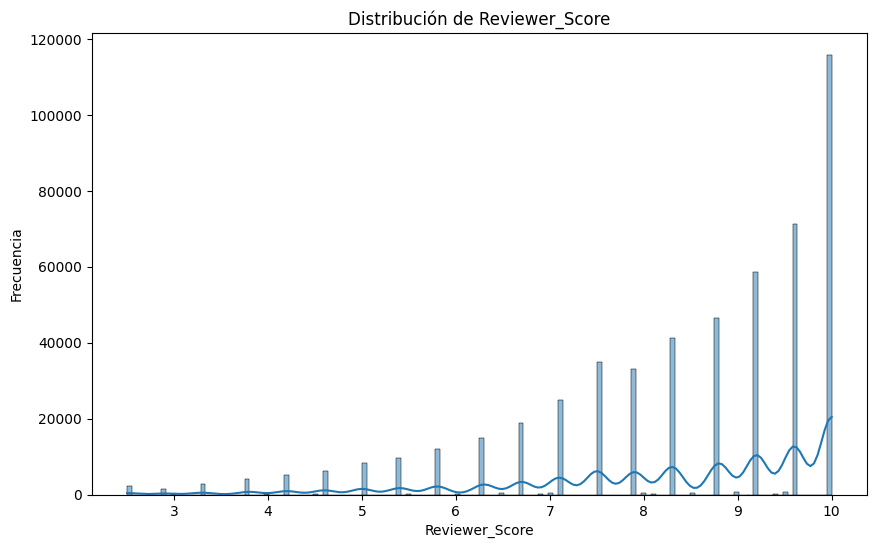

Cantidad de Outliers en Reviewer_Score: 15907


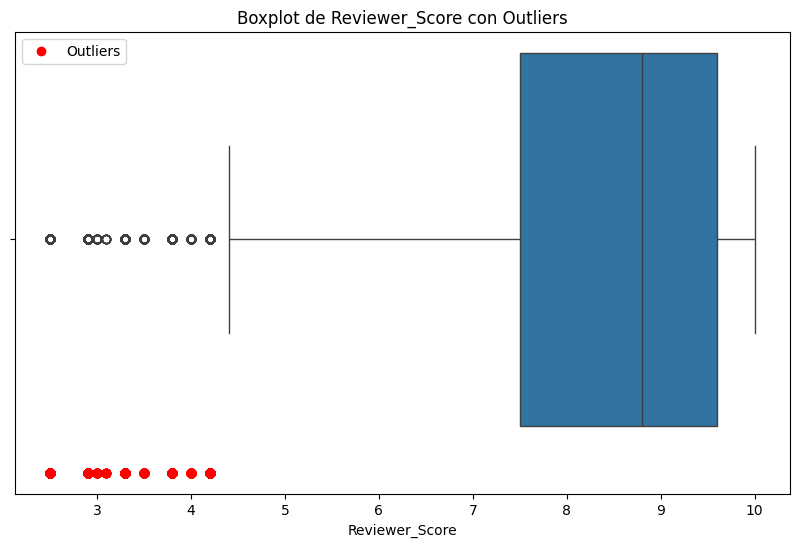


Distribucion de outliers:
count    15907.000000
mean         3.568724
std          0.598566
min          2.500000
25%          3.300000
50%          3.800000
75%          4.200000
max          4.200000
Name: Reviewer_Score, dtype: float64


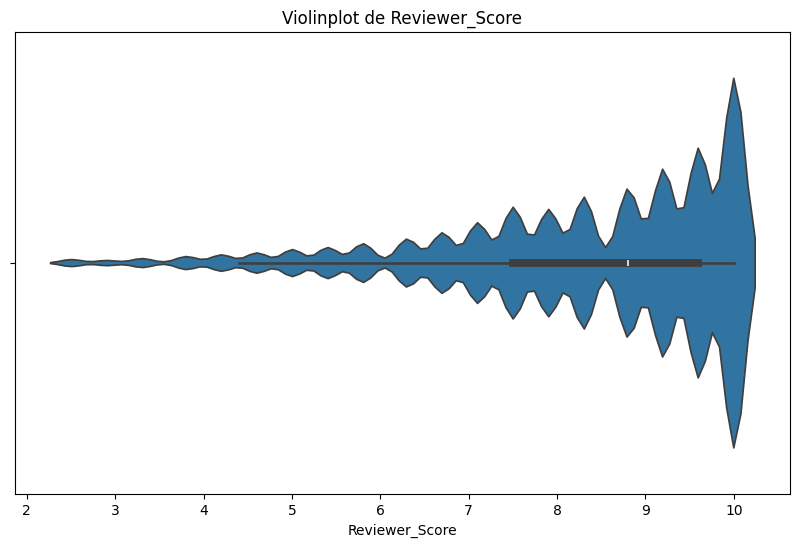

In [ ]:
#@markdown > Graficos de Review_Score, histograma, caja y violín
# Gráfico de distribución de Reviewer_Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviewer_Score'], kde=True)
plt.title('Distribución de Reviewer_Score')
plt.xlabel('Reviewer_Score')
plt.ylabel('Frecuencia')
plt.show()

# Calcular IQR
Q1 = df['Reviewer_Score'].quantile(0.25)
Q3 = df['Reviewer_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define límites de Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Reviewer_Score'] < lower_bound) | (df['Reviewer_Score'] > upper_bound)]

# Print
print("Cantidad de Outliers en Reviewer_Score:", len(outliers))

# Box plot con outliers resaltados
plt.figure(figsize=(10, 6))
sns.boxplot(x='Reviewer_Score', data=df)
plt.title('Boxplot de Reviewer_Score con Outliers')
plt.xlabel('Reviewer_Score')

# Highlight outliers
plt.scatter(outliers['Reviewer_Score'], [0.5] * len(outliers), color='red', label='Outliers')
plt.legend()

plt.show()

# Analisis de la distribucion de outliers
print("\nDistribucion de outliers:")
print(outliers['Reviewer_Score'].describe())
# Gráfico de violín de Reviewer_Score
plt.figure(figsize=(10, 6))
sns.violinplot(x='Reviewer_Score', data=df)
plt.title('Violinplot de Reviewer_Score')
plt.xlabel('Reviewer_Score')
plt.show()


# Analisis de Correlacion de Reseñas Positivas y Negativas

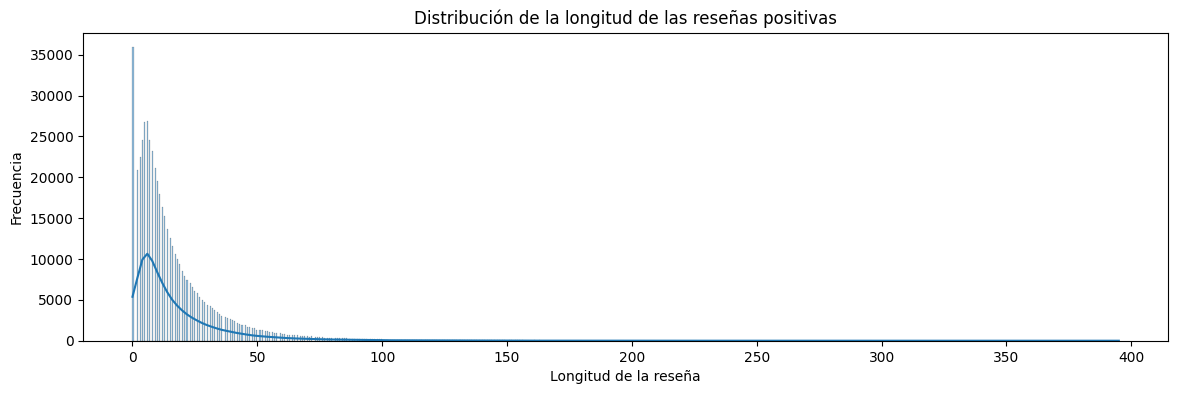

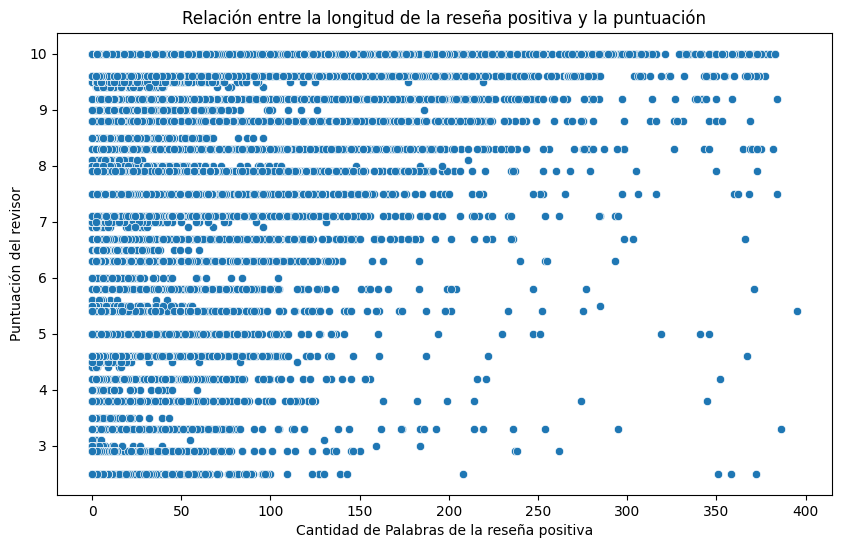

In [ ]:
#@markdown > Análisis de Positive_Review

# Gráfico de distribución de la longitud de las reseñas positivas
plt.figure(figsize=(14, 4))
sns.histplot(df['Review_Total_Positive_Word_Counts'], kde=True)
plt.title('Distribución de la longitud de las reseñas positivas')
plt.xlabel('Longitud de la reseña')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la longitud de la reseña positiva y la puntuación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', data=df)
plt.title('Relación entre la longitud de la reseña positiva y la puntuación')
plt.xlabel('Cantidad de Palabras de la reseña positiva')
plt.ylabel('Puntuación del revisor')
plt.show()



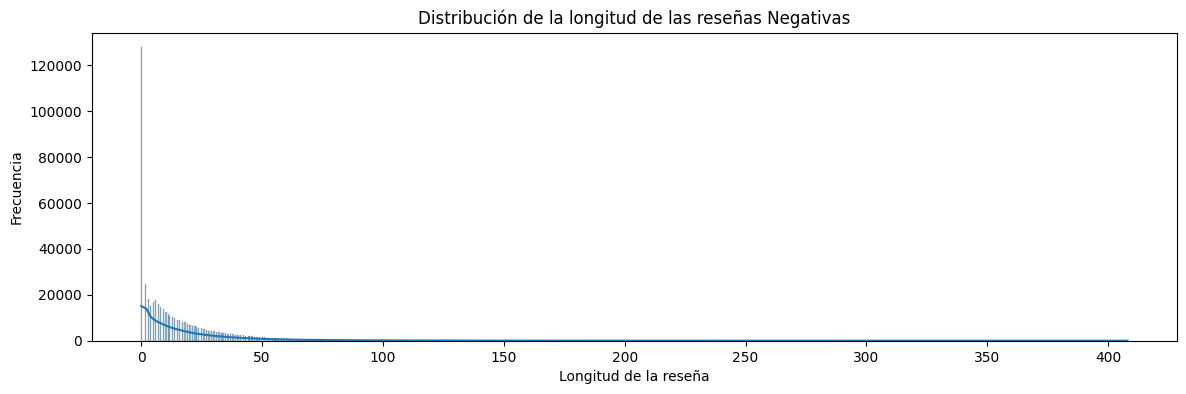

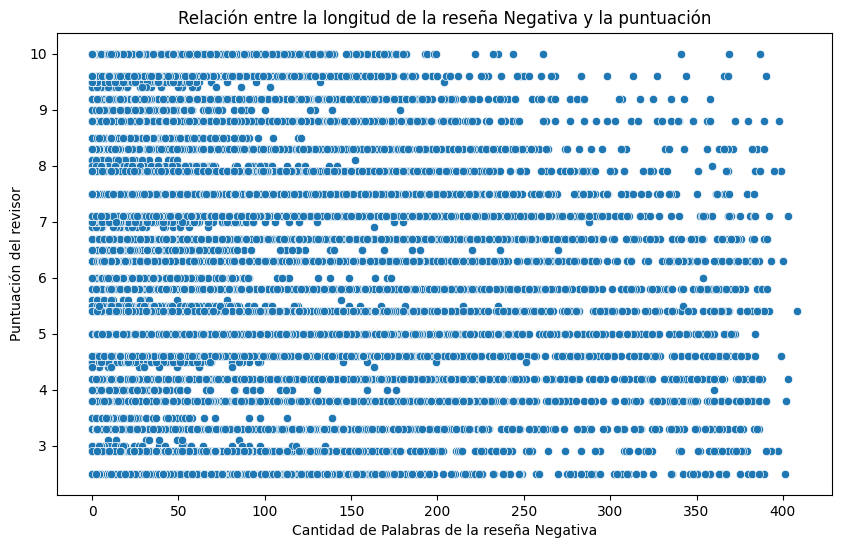

In [ ]:
#@markdown > Análisis de Negative_Review

# Gráfico de distribución de la longitud de las reseñas Negativas
plt.figure(figsize=(14, 4))
sns.histplot(df['Review_Total_Negative_Word_Counts'], kde=True)
plt.title('Distribución de la longitud de las reseñas Negativas')
plt.xlabel('Longitud de la reseña')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la longitud de la reseña Negativa y la puntuación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', data=df)
plt.title('Relación entre la longitud de la reseña Negativa y la puntuación')
plt.xlabel('Cantidad de Palabras de la reseña Negativa')
plt.ylabel('Puntuación del revisor')
plt.show()


---
# Analisis de Palabras en Reviews

Utilizaremos WordClouds para visualizar las palabras mas frecuentes, para mejorar la utilidad de los datos categorizamos las reseñas de la siguiente manera:
- Buenas reviews: Review_Score >8
- Malas reviews (para hoteles de lujo): Review_Score <= 8


Stopwords necesita una revision porque hay palabras incluidas que quizá si sean relevantes en este contexto (ejemplo "Great")

In [ ]:
#@markdown > WordCloud de palabras Positivas en buenas reviews

text = " ".join(df[df["Reviewer_Score"] > 8.0]["Positive_Review"])
wordcloud = WordCloud(width=800, height=400).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Positive Reviews on good Scores")
fig.show()


In [ ]:
#@markdown > WordCloud de palabras Positivas en malas reviews

text = " ".join(df[df["Reviewer_Score"] <= 8.0]["Positive_Review"])
wordcloud = WordCloud(width=800, height=400).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Positive Reviews on bad Scores")
fig.show()


In [ ]:
#@markdown > WordCloud de palabras Negativas en buenas reviews

text = " ".join(df[df["Reviewer_Score"] >= 8.0]["Negative_Review"])
wordcloud = WordCloud(width=800, height=400).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Negative Reviews of good Scores")
fig.show()


In [ ]:
#@markdown > WordCloud de palabras Negativas en malas reviews

text = " ".join(df[df["Reviewer_Score"] <= 8.0]["Negative_Review"])
wordcloud = WordCloud(width=800, height=400).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Negative Reviews on bad Scores")
fig.show()

---
## Buscando palabras Clave

Identificaremos las 50 palabras más frecuentes en reseñas positivas y negativas __ignorando las stop words__

In [ ]:
#@markdown > Configuramos las stop words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Descargar recursos de NLTK si es necesario
nltk.download('punkt')
nltk.download('punkt_tab')

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#@markdown > Obtenemos y visualizamos la frecuencia de las 50 palabras mas utilizadas en reseñas positivas

#obtener frecuencia de las 50 palabras mas usadas en "Positive_Review" ignorando stopwords y hacer un enneagram

# Obtener todas las reseñas positivas
positive_reviews = " ".join(df["Positive_Review"].astype(str))

# Tokenizar las reseñas y eliminar las stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(positive_reviews)
filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words and w.isalnum()]

# Contar la frecuencia de las palabras
word_counts = Counter(filtered_tokens)

# Obtener las 50 palabras más frecuentes
top_50_words_Positive = word_counts.most_common(50)

# Crear un diagrama de barras con Plotly
fig = px.bar(x=[word for word, count in top_50_words_Positive],
             y=[count for word, count in top_50_words_Positive],
             title="Frecuencia de las 50 palabras más usadas en Positive_Review",
             labels={"x": "Palabras", "y": "Frecuencia"})
fig.show()


In [ ]:
#@markdown > Obtenemos y visualizamos la frecuencia de las 50 palabras mas utilizadas en reseñas negativas

# Obtener todas las reseñas negativas
negative_reviews = " ".join(df["Negative_Review"].astype(str))

# Tokenizar las reseñas y eliminar las stopwords
#stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(negative_reviews)
filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words and w.isalnum()]

# Contar la frecuencia de las palabras
word_counts = Counter(filtered_tokens)

# Obtener las 50 palabras más frecuentes
top_50_words_Negative = word_counts.most_common(50)

# Crear un diagrama de barras con Plotly
fig = px.bar(x=[word for word, count in top_50_words_Negative],
             y=[count for word, count in top_50_words_Negative],
             title="Frecuencia de las 50 palabras más usadas en Negative_Review",
             labels={"x": "Palabras", "y": "Frecuencia"})
fig.show()


In [ ]:
from plotly.graph_objs import *

#@markdown > Representación porcentual de palabras en reviews negativas en un grafico pie chart

labels = [word for word, count in top_50_words_Negative]
values = [count for word, count in top_50_words_Negative]

trace = go.Pie(labels=labels, values=values)

layout = go.Layout(title="Las 50 palabras más utilizadas en las reseñas negativas")
fig = go.Figure(data=[trace], layout=layout)

fig.show()


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

#@markdown > En el análisis anterior la palabra room fue la mas frecuente, pero por si misma carece de reelevacia sin un contexto

# @markdown > Si realizamos un análisis de su contexto podemos tener una idea de cuáles son los "puntos flojos" identificados por los clientes, como por ejemplo el servicio a la habitación o un tamaño pequeño.

#@markdown > **Ingresar palabra a analizar su contexto**
target_word = "room" # @param {type:"string"}

# Descargar recursos de NLTK si es necesario
nltk.download('punkt')

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Alternar Negative_Review por Positive_Review segun sea necesario... ;)
# Obtener todas las reseñas negativas
negative_reviews = df[df["Reviewer_Score"] <= 5]["Negative_Review"].astype(str)

# Tokenizar las reseñas, eliminar stopwords y buscar contexto de "room"
word_context = Counter()
for review in negative_reviews:
  tokens = word_tokenize(review)
  for i, word in enumerate(tokens):
    if word.lower() == target_word and i > 0 and i < len(tokens) - 1:
      prev_word = tokens[i - 1].lower()
      next_word = tokens[i + 1].lower()
      if prev_word not in stop_words and prev_word.isalnum():
        word_context[prev_word] += 1
      if next_word not in stop_words and next_word.isalnum():
        word_context[next_word] += 1

# Obtener las palabras más frecuentes en el contexto de "room"
top_context_words = word_context.most_common(30)

# Crear un diagrama de barras con Plotly
fig = px.bar(x=[word for word, count in top_context_words],
             y=[count for word, count in top_context_words],
             title="Palabras más frecuentes en el contexto de 'room' en reseñas negativas",
             labels={"x": "Palabras", "y": "Frecuencia"})
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#segundo intento de eneagrama para review negativa,
#probablemente necesitemos usar un df acotado para probarlo mas rapido

# Create an array with column names based on top_50_words_Negative and 'id'
column_names = ['id'] + [word for word, count in top_50_words_Negative]

# Create an empty DataFrame with the specified column names
word_counts_df = pd.DataFrame(columns=column_names)

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    negative_review = row['Negative_Review']
    review_id = row['id']

    # Create a dictionary to store word counts for the current row
    word_counts = {'id': review_id}

    # Tokenize and count words from the negative review
    if isinstance(negative_review, str):
        word_tokens = word_tokenize(negative_review)
        filtered_tokens = [w.lower() for w in word_tokens if not w.lower() in stop_words and w.isalnum()]
        for word in filtered_tokens:
            if word in [word for word, count in top_50_words_Negative]:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1

    # Fill missing counts with 0
    for word, count in top_50_words_Negative:
        if word not in word_counts:
            word_counts[word] = 0

    # Append the word counts for the current row to the DataFrame
    word_counts_df = pd.concat([word_counts_df, pd.DataFrame([word_counts])], ignore_index=True)


# Print or use the word_counts_df as needed
print(word_counts_df)



In [ ]:
###POR AHORA ESTA VERSION NO SIRVE
top_50_words_negative_list = [word for word, count in top_50_words_Negative]
word_counts_array = np.zeros((len(df), len(top_50_words_negative_list)))

for index, row in df.iterrows():
    negative_review = str(row['Negative_Review'])
    word_tokens = word_tokenize(negative_review)
    for word in word_tokens:
        if word in top_50_words_negative_list:
            word_index = top_50_words_negative_list.index(word)
            word_counts_array[index, word_index] += 1


KeyboardInterrupt: 

In [ ]:
# prompt: Export df_sample as .csv

from google.colab import files

df_sample.to_csv('df_sample.csv', encoding = 'utf-8-sig')
files.download('df_sample.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Creacion de caracteristicas con palabras clave

In [ ]:
import re, nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Para reviews negativas
negative_comment = []

for comment in df['Negative_Review']:
    only_letters = re.sub("[^a-zA-Z]", " ",comment)
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t)
              for t in filtered_result]
    negative_comment.append(' '.join(lemmas))

In [ ]:
# Buscamos palabras importantes en negative_review

cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(negative_comment)
temp1_counts = most_negative_words.sum(axis=0)
temp1_words = cv.vocabulary_

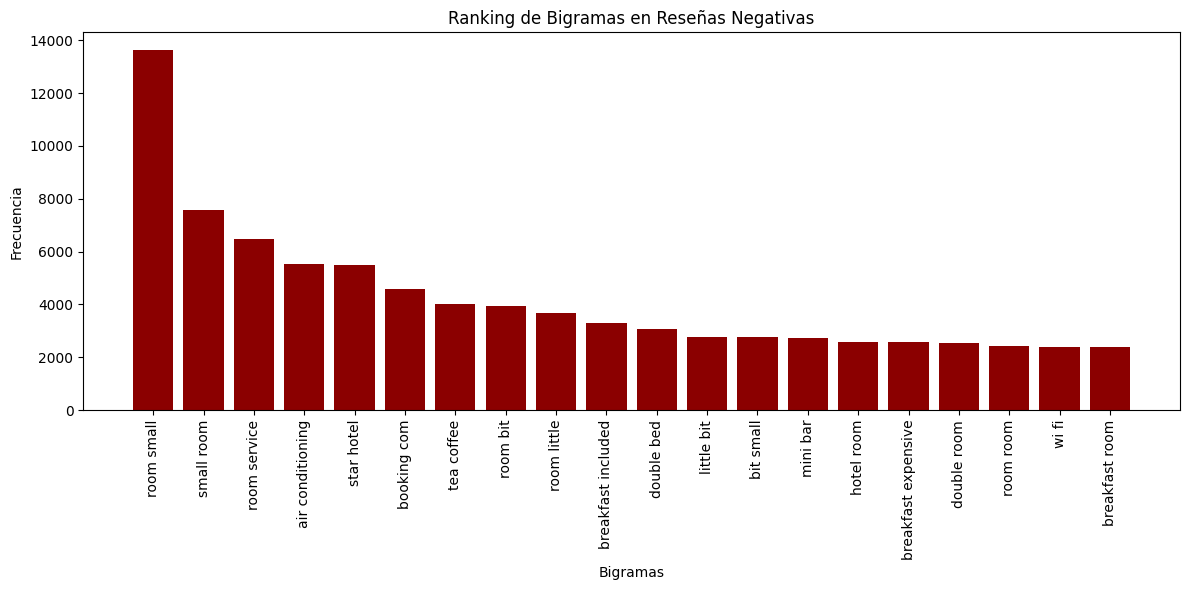

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtén los nombres de las características (bigramas)
feature_names = cv.get_feature_names_out()

# Convierte la matriz dispersa a una densa y suma las filas para obtener las frecuencias
frequencies = most_negative_words.toarray().sum(axis=0)

# Crea una lista de tuplas (bigrama, frecuencia)
bigram_frequencies = list(zip(feature_names, frequencies))

# Ordena la lista por frecuencia en orden descendente
bigram_frequencies.sort(key=lambda item: item[1], reverse=True)

# Separa los bigramas y las frecuencias en listas separadas para graficar
bigrams = [bigram for bigram, frequency in bigram_frequencies]
frequencies = [frequency for bigram, frequency in bigram_frequencies]

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
plt.bar(bigrams, frequencies, color='darkred')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.xlabel("Bigramas")
plt.ylabel("Frecuencia")
plt.title("Ranking de Bigramas en Reseñas Negativas")
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()


In [ ]:
print(temp1_words)

{'booking com': 2, 'small room': 16, 'tea coffee': 18, 'breakfast included': 4, 'little bit': 9, 'hotel room': 8, 'room service': 14, 'room room': 13, 'room little': 12, 'star hotel': 17, 'mini bar': 10, 'room small': 15, 'breakfast expensive': 3, 'air conditioning': 0, 'double room': 7, 'double bed': 6, 'bit small': 1, 'room bit': 11, 'wi fi': 19, 'breakfast room': 5}


In [ ]:
# Para reviews positivas
positive_comment = []

for comment in df['Positive_Review']:
    only_letters2 = re.sub("[^a-zA-Z]", " ",comment)
    tokens2 = nltk.word_tokenize(only_letters2)
    lower_case2 = [l.lower() for l in tokens2]
    filtered_result2 = list(filter(lambda l: l not in stop_words, lower_case2))
    lemmas2 = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result2]
    positive_comment.append(' '.join(lemmas2))

In [ ]:
#@markdown > Buscamos palabras importantes en positive_review

cv2 = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv2.fit_transform(positive_comment)
temp2_counts = most_positive_words.sum(axis=0)
temp2_words = cv2.vocabulary_


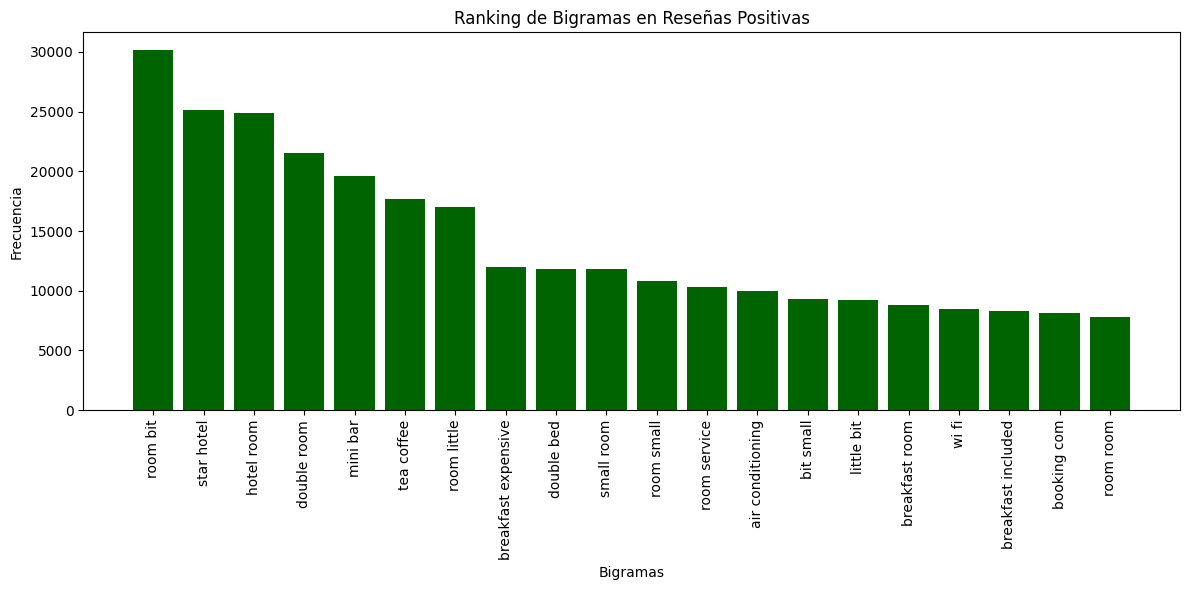

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtén los nombres de las características (bigramas)
feature_names = cv.get_feature_names_out()

# Convierte la matriz dispersa a una densa y suma las filas para obtener las frecuencias
frequencies = most_positive_words.toarray().sum(axis=0)

# Crea una lista de tuplas (bigrama, frecuencia)
bigram_frequencies = list(zip(feature_names, frequencies))

# Ordena la lista por frecuencia en orden descendente
bigram_frequencies.sort(key=lambda item: item[1], reverse=True)

# Separa los bigramas y las frecuencias en listas separadas para graficar
bigrams = [bigram for bigram, frequency in bigram_frequencies]
frequencies = [frequency for bigram, frequency in bigram_frequencies]

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
plt.bar(bigrams, frequencies, color='darkgreen')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad
plt.xlabel("Bigramas")
plt.ylabel("Frecuencia")
plt.title("Ranking de Bigramas en Reseñas Positivas")
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()


In [ ]:
print(temp2_words)

{'great location': 11, 'location good': 14, 'good location': 10, 'friendly staff': 8, 'good breakfast': 9, 'walking distance': 19, 'comfy bed': 5, 'comfortable room': 4, 'staff friendly': 17, 'friendly helpful': 7, 'helpful staff': 12, 'clean room': 2, 'staff helpful': 18, 'bed comfortable': 0, 'room clean': 16, 'comfortable bed': 3, 'location great': 15, 'breakfast good': 1, 'excellent location': 6, 'location excellent': 13}




```
# Esto tiene formato de código
```

#### Palabras frecuentes en negative_review como características

In [ ]:
#room_small
room_small = np.zeros(len(df))
for i in range(len(df)):
    if ("room small" in negative_comment[i]) or ("small room" in negative_comment[i]):
        room_small[i] = 1

#air-conditioner
air_conditioning = np.zeros(len(df))
for i in range(len(df)):
    if ("air conditioning" in negative_comment[i]) or ("air conditioner" in negative_comment[i]) :
        air_conditioning[i] = 1
np.sum(air_conditioning)

#breakfast
breakfast = np.zeros(len(df))
for i in range(len(df)):
    if ("breakfast expensive" in negative_comment[i]) or ("breakfast included" in negative_comment[i]) or ("breakfast room" in negative_comment[i]) or ("tea coffee" in negative_comment[i]):
        breakfast[i] = -1
np.sum(breakfast)

#wi-fi
wi_fi = np.zeros(len(df))
for i in range(len(df)):
    if ("wi fi" in negative_comment[i]):
        wi_fi[i] = 1

#booking com
booking_com = np.zeros(len(df))
for i in range(len(df)):
    if ("booking com" in negative_comment[i]):
        booking_com[i] = 1
np.sum(booking_com)

#room_problem
room_problem = np.zeros(len(df))
for i in range(len(df)):
    if ("mini bar" in negative_comment[i]) or ("room service" in negative_comment[i]) or ("double bed" in negative_comment[i]) or ("double room" in negative_comment[i]):
        room_problem[i] = 1
np.sum(room_problem)


13496.0

#### Palabras frecuentes en positive_reviews como características

In [ ]:
#Staff
staff = np.zeros(len(df))
for i in range(len(df)):
    if ("friendly helpful" in positive_comment[i]) or ("friendly staff" in positive_comment[i]) or ("helpful staff" in positive_comment[i]) or ("staff helpful" in positive_comment[i]) or ("staff friendly" in positive_comment[i]):
        staff[i] = 1
np.sum(staff)

#bed and room
bed_and_room = np.zeros(len(df))
for i in range(len(df)):
    if ("bed comfortable" in positive_comment[i]) or ("clean room" in positive_comment[i]) or ("comfortable bed" in positive_comment[i]) or ("comfortable room" in positive_comment[i]) or ("comfy bed" in positive_comment[i]) or ("room clean" in positive_comment[i]) :
        bed_and_room[i] = 1
np.sum(bed_and_room)

#breakfast
for i in range(len(df)):
    if ("breakfast good" in positive_comment[i]) or ("good breakfast" in positive_comment[i]):
        breakfast[i] = breakfast[i]+ 1
np.sum(breakfast)

#Location
location = np.zeros(len(df))
for i in range(len(df)):
    if ("good location" in positive_comment[i]) or ("great location" in positive_comment[i]) or ("location excellent" in positive_comment[i]) or ("location great" in positive_comment[i]) or ("location good" in positive_comment[i]) or ("walking distance" in positive_comment[i]) or ("excellent location" in positive_comment[i]):
        location[i] = 1
np.sum(location)

90923.0

In [ ]:
#Agregamos nuevas columnas
df['room_small'] = room_small
df['wi_fi'] = wi_fi
df['air_conditioning'] = air_conditioning
df['breakfast'] = breakfast
df['booking_com'] = booking_com
df['room_problem'] = room_problem
df['location'] = location
df['staff'] = staff
df['bed_and_room'] = bed_and_room

In [ ]:
df.head()

,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,...,id,room_small,wi_fi,air_conditioning,breakfast,booking_com,room_problem,location,staff,bed_and_room
0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,...,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,...,3,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
3,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,...,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Obtenemos año y mes desde Review_Date
year = df['Review_Date'].map(lambda x: x.split('/')[2])
month = df['Review_Date'].map(lambda x: x.split('/')[0])
df['month'] = month
df['year'] = year
del df['Review_Date']

## Agregamos Información reelevante de los tags

In [ ]:
# Tipo de viaje de placer, negocios o ambos.
# "Trip_type": 1 = Placer, 2 = Negocios, 3 = Ambos, 0 = ninguno.
df['Leisure'] = df['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df['Business'] = df['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df['Trip_type'] = df['Leisure'] + df['Business']

In [ ]:
trip_type_counts = df['Trip_type'].value_counts()
count_trip_type_0 = trip_type_counts.get(0, 0)
print(f"Number of rows where Trip_type is 0: {count_trip_type_0}")

Number of rows where Trip_type is 0: 15004


In [ ]:
# Asignamos de forma aleatoria los 15004 tipo de viajes que no estan tipificados.
import random
df['Trip_type'] = df[df['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
df['Trip_type'] = df['Trip_type'].fillna(0)
df['Trip_type'] = df['Trip_type'] + df['Business'] + df['Leisure']
del df['Leisure'] , df['Business']

In [ ]:
df['Trip_type'].value_counts()

,count
Trip_type,
1.0,429395
2.0,85817


In [ ]:
# Pareja o Solo o Grupo o Familia con niños mayores o Familia con niños pequeños
df['Solo'] = df['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
df['Couple'] = df['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
df['Group'] = df['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
df['Family_with_young_children'] = df['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
df['Family_with_older_children'] = df['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
df['whom'] = df['Solo'] + df['Couple'] + df['Group'] + df['Family_with_young_children'] + df['Family_with_older_children']
del df['Solo'], df['Couple'], df['Group'], df['Family_with_young_children'], df['Family_with_older_children']

# Para tag no especificado es decir valor "0" se lo sumamos a la característica que mas tiene ya que es una cantidad marginal
df['whom'] = df['whom'].map(lambda x: 2 if x == 0 else x)
df.whom.value_counts()


,count
whom,
2,254148
1,108431
3,65338
4,60975
5,26320


In [ ]:
# Largo de estadía en días

df['Stayed_1_days'] = df['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
df['Stayed_2_days'] = df['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
df['Stayed_3_days'] = df['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
df['Stayed_4_days'] = df['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
df['Stayed_5_days'] = df['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
df['Stayed_6_days'] = df['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
df['Stayed_7_days'] = df['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
df['Stayed_8_days'] = df['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
df['Stayed_9_days'] = df['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
df['Stayed_10_days'] = df['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
df['Stayed_11_days'] = df['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
df['Stayed_12_days'] = df['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
df['Stayed_13_days'] = df['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
df['Stayed_14_days'] = df['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
df['Stayed_15_days'] = df['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
df['Stayed_16_days'] = df['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
df['Stayed_17_days'] = df['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
df['Stayed_18_days'] = df['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
df['Stayed_19_days'] = df['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
df['Stayed_20_days'] = df['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)


In [ ]:
temp_list = []
for j in range(20,40):
    sum = np.sum(df.iloc[:,j])/(j-19)
    temp_list.append(sum)

staying = np.array(temp_list,dtype=int)
np.sum(staying)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df['stayed_days'] = df['Stayed_1_days'] + df['Stayed_2_days'] + df['Stayed_3_days'] + df['Stayed_4_days'] + df['Stayed_5_days'] + df['Stayed_6_days'] + df['Stayed_7_days'] + df['Stayed_8_days'] + df['Stayed_9_days'] + df['Stayed_10_days'] + df['Stayed_11_days'] + df['Stayed_12_days'] + df['Stayed_13_days'] + df['Stayed_14_days'] + df['Stayed_15_days'] +df['Stayed_16_days'] + df['Stayed_17_days'] + df['Stayed_18_days'] + df['Stayed_19_days'] + df['Stayed_20_days']
del df['Stayed_1_days'] , df['Stayed_2_days'] , df['Stayed_3_days'] , df['Stayed_4_days'], df['Stayed_5_days'] , df['Stayed_6_days'] , df['Stayed_7_days'] , df['Stayed_8_days'] , df['Stayed_9_days'] , df['Stayed_10_days'] , df['Stayed_11_days'] , df['Stayed_12_days'] , df['Stayed_13_days'] , df['Stayed_14_days'] , df['Stayed_15_days'] , df['Stayed_16_days'] , df['Stayed_17_days'] , df['Stayed_18_days'] , df['Stayed_19_days'] , df['Stayed_20_days']


In [ ]:
df.stayed_days.value_counts()
#Asignaremos las estadias mayores a 20 como 21
df['stayed_days'] = df['stayed_days'].map(lambda x: 21 if x == 0 else x)


In [ ]:
# Existen estadías nulas?
len(df[df['stayed_days'] == 0])

0

In [ ]:
df.shape

(515214, 25)

# Seleccion de características reelevantes

Text(0.5, 1.0, 'Booking.com')

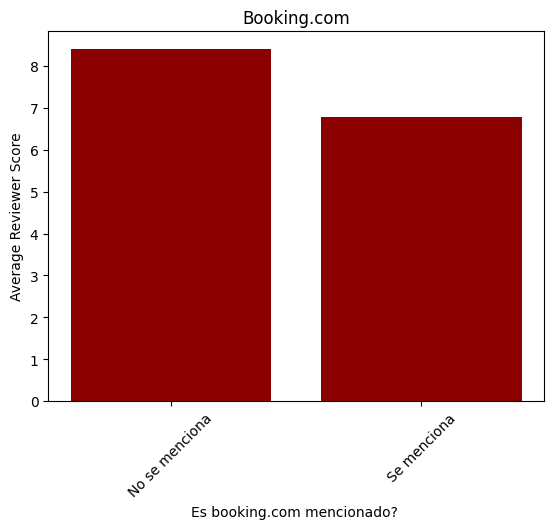

In [ ]:

#Booking.com
booking_avg=df.groupby('booking_com')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,booking_avg, color='darkred')
plt.xticks(Index,['No se menciona','Se menciona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Es booking.com mencionado? ')
plt.title('Booking.com')

`Conclusión: Cuando no se menciona booking.com la puntuacion es mayor.`

Text(0.5, 1.0, 'Wifi')

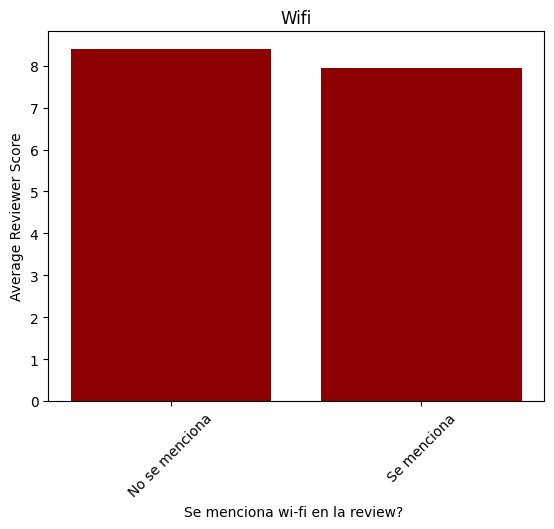

In [ ]:
#Wi-fi
wifi_avg=df.groupby('wi_fi')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,wifi_avg, color='darkred')
plt.xticks(Index,['No se menciona','Se menciona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Se menciona wi-fi en la review? ')
plt.title('Wifi')



```
Cuando se menciona puede significar una puntuacion mas baja
```




Text(0.5, 1.0, 'Breakfast')

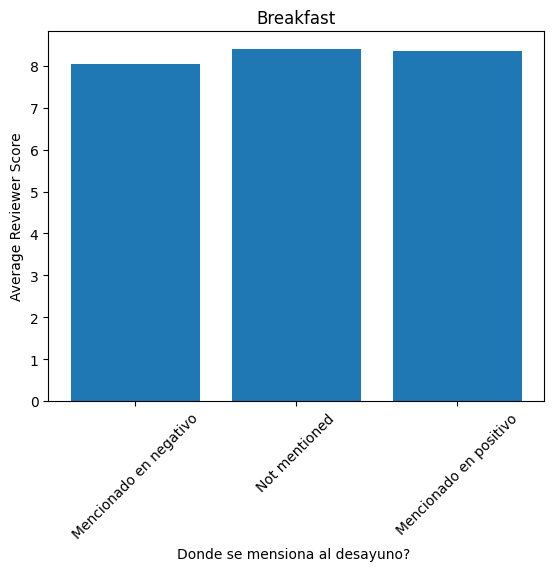

In [ ]:
##Breakfast
breackfast_avg=df.groupby('breakfast')['Reviewer_Score'].mean()
Index = [-1,0,1]
plt.bar(Index,breackfast_avg)
plt.xticks(Index,['Mencionado en negativo','No se menciona','Mencionado en positivo'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Donde se menciona al desayuno? ')
plt.title('Breakfast')

`Conclusión: No nos parece algo reelevante`




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21')])

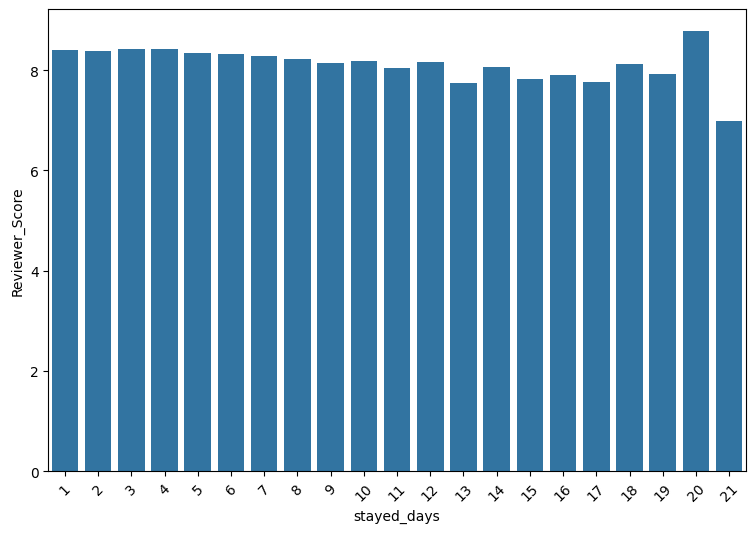

In [ ]:
## Dias de estadía
stayed_days_hist=df.groupby("stayed_days")['Reviewer_Score'].mean().reset_index().sort_values(by='stayed_days',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='stayed_days',y='Reviewer_Score', data=stayed_days_hist)
plt.xticks(rotation=45)

`Conclusión: Cuantos mayor es la estadía puede afectar negativamente al score`

([0, 1, 2, 3, 4],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

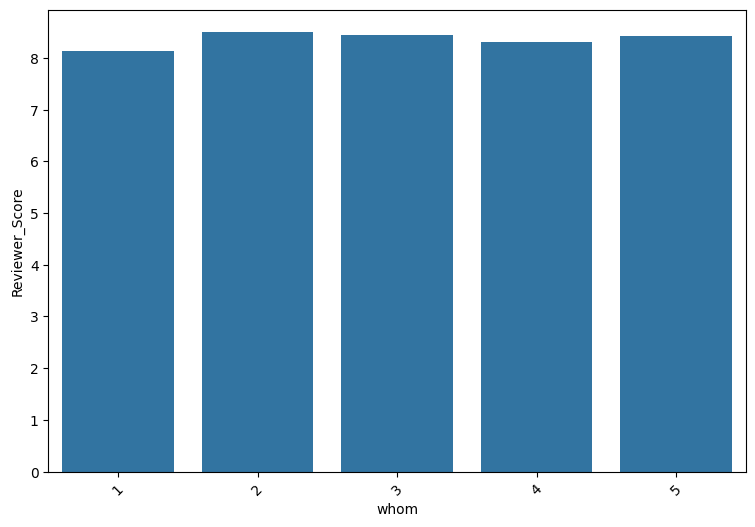

In [ ]:
#Whom (Estadia individual o compartida)
whom_hist=df.groupby("whom")['Reviewer_Score'].mean().reset_index().sort_values(by='whom',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='whom',y='Reviewer_Score', data=whom_hist)
plt.xticks(rotation=45)

`Conclusión: este atributo no nos parece representativo respecto al score`

Text(0.5, 1.0, 'Small Room')

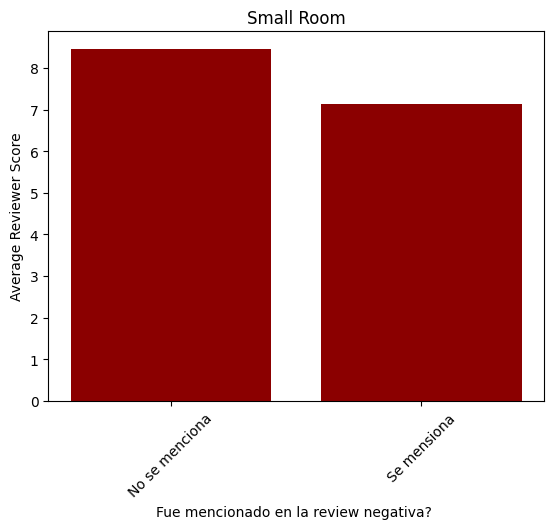

In [ ]:
##Small Room
sr_avg=df.groupby('room_small')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,sr_avg, color='darkred')
plt.xticks(Index,['No se menciona','Se mensiona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Fue mencionado en la review negativa? ')
plt.title('Small Room')

`Conclusión: Es bastante importante en la calificacion del revisor`

Text(0.5, 1.0, 'Air Conditioning')

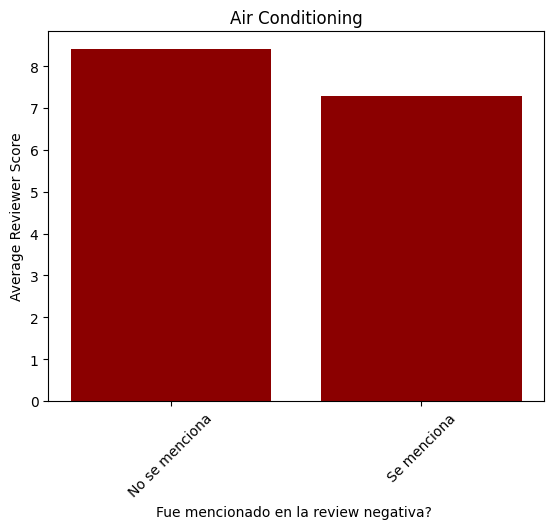

In [ ]:
##Air_conditioners
ac_avg=df.groupby('air_conditioning')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,ac_avg, color='darkred')
plt.xticks(Index,['No se menciona','Se menciona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Fue mencionado en la review negativa? ')
plt.title('Air Conditioning')

`Conclusión: Es reelevante para determinar el score`

Text(0.5, 1.0, 'Room Problem')

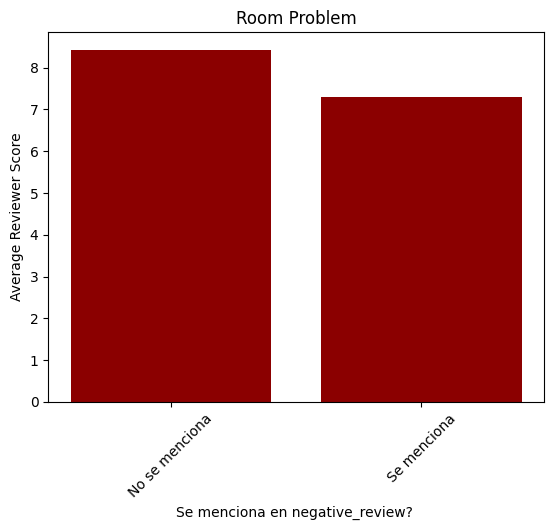

In [ ]:
##room_problem
rp_avg=df.groupby('room_problem')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,rp_avg, color='darkred')
plt.xticks(Index,['No se menciona','Se menciona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Se menciona en negative_review? ')
plt.title('Room Problem')

`Conclusión: Es influyente en la calificacion del revisor`

Text(0.5, 1.0, 'Location')

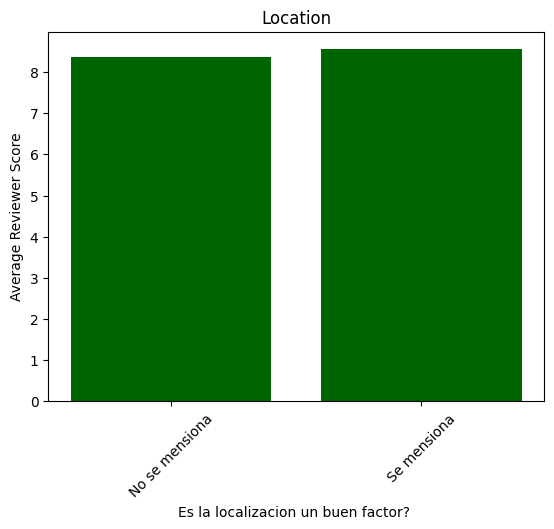

In [ ]:
##location
lc_avg=df.groupby('location')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,lc_avg,color='darkgreen')
plt.xticks(Index,['No se mensiona','Se mensiona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Es la localizacion un buen factor? ')
plt.title('Location')

`Conclusión: No es influyente en la calificacion del revisor`

Text(0.5, 1.0, 'Staff')

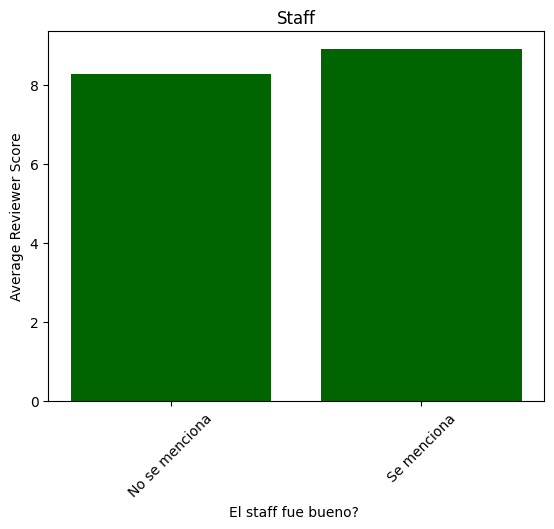

In [ ]:
##Staff
st_avg=df.groupby('staff')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,st_avg,color='darkgreen')
plt.xticks(Index,['No se menciona','Se menciona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('El staff fue bueno? ')
plt.title('Staff')

`Conclusión: Puede influir y mejorar la calificación`

Text(0.5, 1.0, 'Bed and Room')

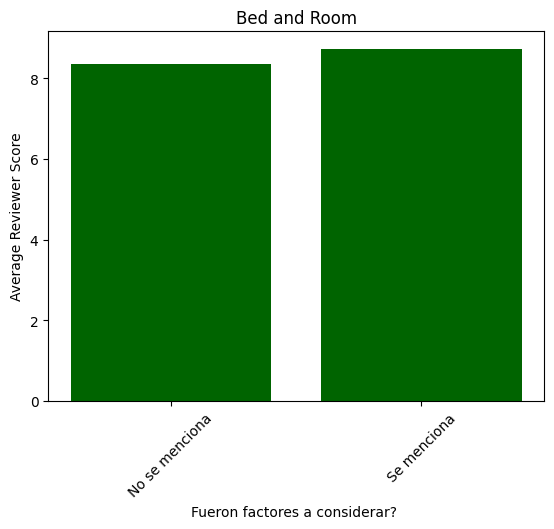

In [ ]:
##Bed_and_Room
br_avg=df.groupby('bed_and_room')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,br_avg,color='darkgreen')
plt.xticks(Index,['No se menciona','Se menciona'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Fueron factores a considerar? ')
plt.title('Bed and Room')

`Conclusión: No nos parece importante en la calificacion`

Text(0.5, 1.0, 'Trip Type')

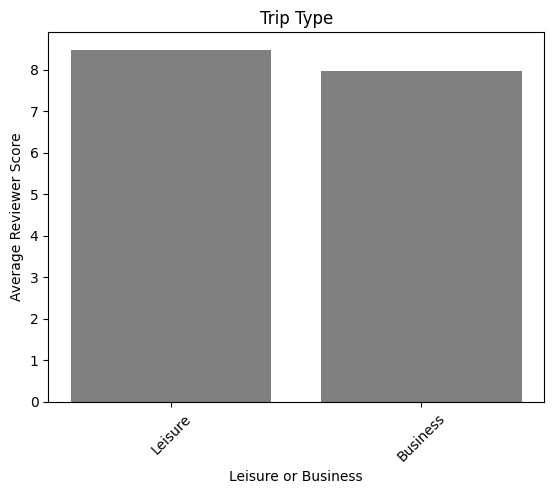

In [ ]:
##Trip Type
tt_avg=df.groupby('Trip_type')['Reviewer_Score'].mean()
Index = [1,2]
plt.bar(Index,tt_avg,color='gray')
plt.xticks(Index,['Leisure','Business'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Leisure or Business')
plt.title('Trip Type')

`Conclusión: Los viajes de placer tiene mejoran gradualmente la calificación`

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '9'),
  Text(1, 0, '8'),
  Text(2, 0, '7'),
  Text(3, 0, '6'),
  Text(4, 0, '5'),
  Text(5, 0, '4'),
  Text(6, 0, '3'),
  Text(7, 0, '2'),
  Text(8, 0, '12'),
  Text(9, 0, '11'),
  Text(10, 0, '10'),
  Text(11, 0, '1')])

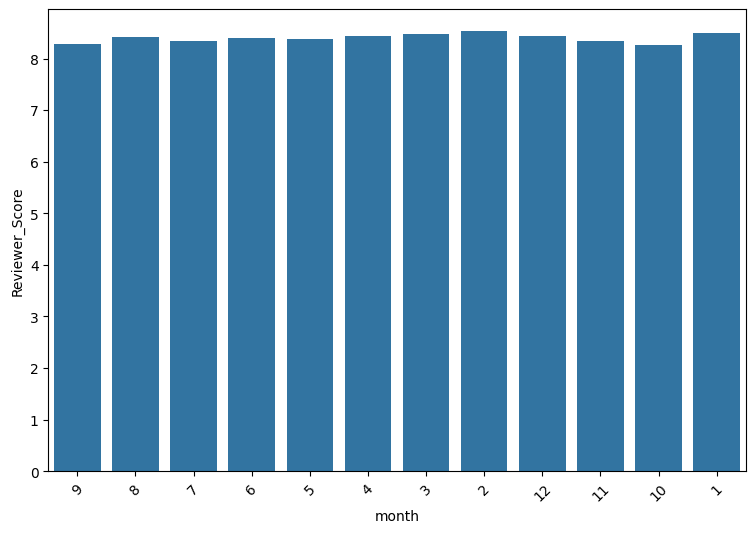

In [ ]:
## Month
month_hist=df.groupby("month")['Reviewer_Score'].mean().reset_index().sort_values(by='month',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='month',y='Reviewer_Score', data=month_hist)
plt.xticks(rotation=45)

`Conclusion el mes no es importante`

([0, 1, 2], [Text(0, 0, '2017'), Text(1, 0, '2016'), Text(2, 0, '2015')])

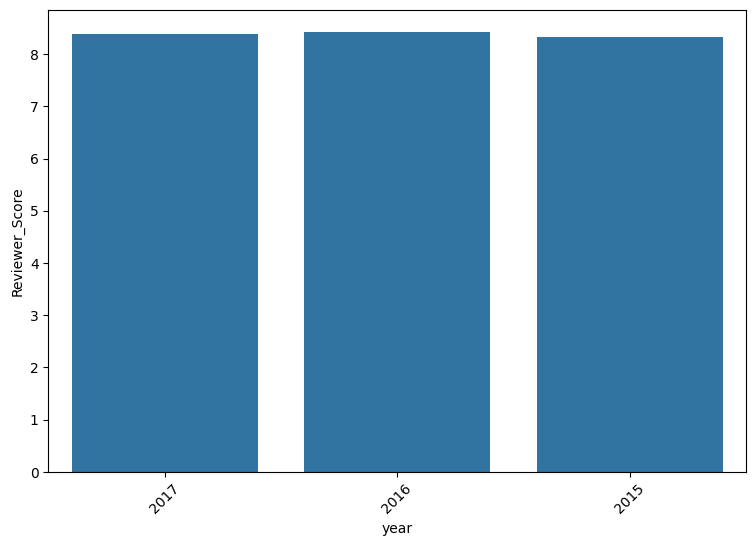

In [ ]:
##Year
year_hist=df.groupby("year")['Reviewer_Score'].mean().reset_index().sort_values(by='year',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='year',y='Reviewer_Score', data=year_hist)
plt.xticks(rotation=45)

`Conslusión: el año no es importante`

# Preparacion y entrenamiento

In [ ]:
#Removemos columnas innecesarias
data = df.drop(['Hotel_Name','Reviewer_Nationality','Negative_Review','Total_Number_of_Reviews','Positive_Review','Total_Number_of_Reviews_Reviewer_Has_Given','Tags','whom','breakfast','location','bed_and_room','month','year'],axis=1)


In [ ]:
# Reasignaremos para Trip_Type los valores 0 y 1
data['Trip_type'] = data['Trip_type'].map(lambda x: 0 if x == 2 else x)

In [ ]:
# Renombraremos Trip_type como Leisure_or_not
data = data.rename(columns = {'Trip_type':'Leisure_or_not'})

In [ ]:
y = data['Reviewer_Score'].values
X = data.drop('Reviewer_Score',axis=1).values

In [ ]:
#Appliyng XGBoost to our data
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train ,X_test ,y_train ,y_test = train_test_split(X,y ,test_size=0.2 ,random_state = 20)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
xg_train = xgb.DMatrix(X_train, label=y_train)

In [ ]:
xg_test = xgb.DMatrix(X_test, label=y_test)
param = {}
param['objective'] = 'reg:gamma'
param['eta'] = 0.2
param['max_depth'] = 4
param['silent'] = 1
param['nthread'] = 4
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 25
# Guardar el historial de errores
history = {}  # Para almacenar los resultados de cada iteración

In [ ]:
bst = xgb.train(param, xg_train, num_round, watchlist, evals_result=history)
pred = bst.predict(xg_test)

[0]	train-gamma-deviance:1.87286	test-gamma-deviance:1.87473
[1]	train-gamma-deviance:1.38347	test-gamma-deviance:1.38489
[2]	train-gamma-deviance:1.01360	test-gamma-deviance:1.01458


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning:

Pass `evals` as keyword args.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[22:26:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.




[3]	train-gamma-deviance:0.73725	test-gamma-deviance:0.73799
[4]	train-gamma-deviance:0.53310	test-gamma-deviance:0.53358
[5]	train-gamma-deviance:0.38425	test-gamma-deviance:0.38452
[6]	train-gamma-deviance:0.27699	test-gamma-deviance:0.27711
[7]	train-gamma-deviance:0.20073	test-gamma-deviance:0.20071
[8]	train-gamma-deviance:0.14704	test-gamma-deviance:0.14694
[9]	train-gamma-deviance:0.10975	test-gamma-deviance:0.10960
[10]	train-gamma-deviance:0.08410	test-gamma-deviance:0.08390
[11]	train-gamma-deviance:0.06654	test-gamma-deviance:0.06630
[12]	train-gamma-deviance:0.05466	test-gamma-deviance:0.05439
[13]	train-gamma-deviance:0.04667	test-gamma-deviance:0.04637
[14]	train-gamma-deviance:0.04134	test-gamma-deviance:0.04102
[15]	train-gamma-deviance:0.03774	test-gamma-deviance:0.03742
[16]	train-gamma-deviance:0.03535	test-gamma-deviance:0.03503
[17]	train-gamma-deviance:0.03374	test-gamma-deviance:0.03340
[18]	train-gamma-deviance:0.03267	test-gamma-deviance:0.03234
[19]	train-gamm

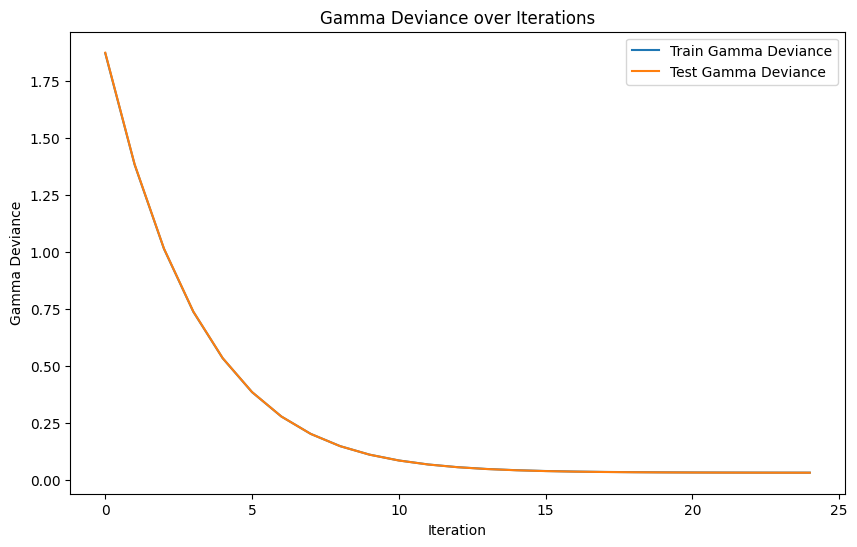

In [ ]:
# Visualizar la evolución del error gamma deviance
import matplotlib.pyplot as plt

# Extraer los valores de gamma deviance para entrenamiento y prueba
train_gamma_deviance = history['train']['gamma-deviance']
test_gamma_deviance = history['test']['gamma-deviance']

# Graficar la evolución de gamma deviance
plt.figure(figsize=(10, 6))
plt.plot(train_gamma_deviance, label='Train Gamma Deviance')
plt.plot(test_gamma_deviance, label='Test Gamma Deviance')
plt.xlabel('Iteration')
plt.ylabel('Gamma Deviance')
plt.title('Gamma Deviance over Iterations')
plt.legend()
plt.show()



> La gráfica nos indica que el modelo está bien ajustado y ha alcanzo una buena capacidad predictiva sin señales evidentes de sobreajuste. La reducción continua de la desviación gamma y la estabilidad de las curvas hacia el final indican que el número de iteraciones elegido es adecuado para el modelo.



Error rate = 0.112259


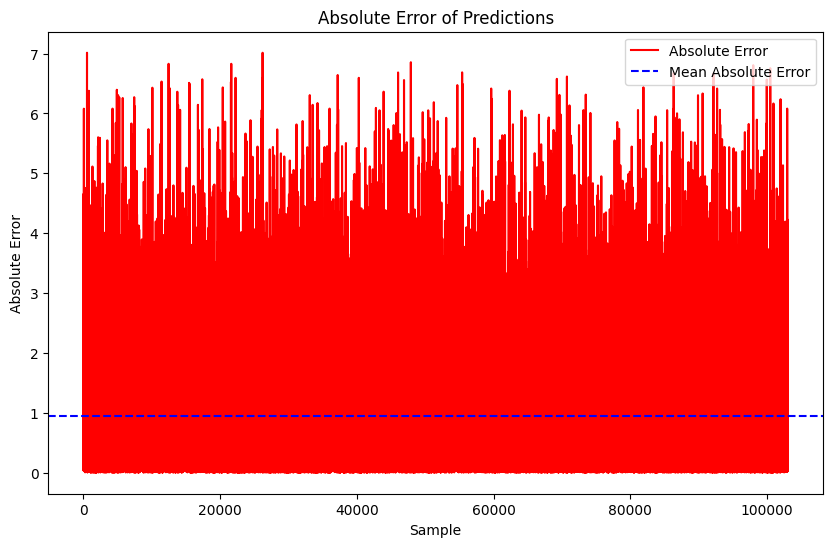

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular el error absoluto para cada predicción
error = np.abs(pred - y_test)

# Calcular el error rate promedio
error_rate = np.mean(error) / np.mean(y_test)
print("Error rate = %f" % error_rate)

# Graficar el error absoluto para cada muestra
plt.figure(figsize=(10, 6))
plt.plot(error, label='Absolute Error', color='red')
plt.axhline(y=np.mean(error), color='blue', linestyle='--', label='Mean Absolute Error')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of Predictions')
plt.legend()
plt.show()






> En términos generales, el modelo parece estar haciendo un trabajo decente, dado el error promedio relativamente bajo (11.26%). Aunque, la variabilidad del error en las muestras individuales (con valores de error de hasta 7) podría indicar que el modelo tiene dificultades para predecir con precisión en algunos casos específicos.










#Segundo Modelo
RandomForest con analisis de sentimientos

In [ ]:
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

##Resampleo para balancear el df

In [ ]:
# obtenemos una muestra balanceada de reviews_df entre is_bad_review=1 y is_bad_review=0

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = reviews_df[reviews_df.is_bad_review==0]
df_minority = reviews_df[reviews_df.is_bad_review==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
  replace=False,    # sample without replacement
  n_samples=len(df_minority),     # to match minority class
random_state=42) # reproducible results

# Combine minority class with downsampled majority class
reviews_df_old= reviews_df
reviews_df = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(reviews_df.is_bad_review.value_counts())

In [ ]:
reviews_df_presampled=reviews_df
reviews_df = reviews_df.sample(frac = 0.05, replace = False, random_state=42);
reviews_df.count()

##Feature Engineering

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#Usamos vader (NTLK) para poder analisar sentimiento y agregarlo al df
sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
# Agregamos una nueva característica: cantidad de caracteres
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# Agregamos una nueva característica: Cantidad de palabras
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
#Usamos genesim para obtener vectores basados en review_clean
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# entrenamos un modelo Doc2Vec con la info del df corregido
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [ ]:
#Usamos tf-idf para vectorizar las palabras de las reviews con analisis de contexto
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

## Nueva Exploracion

In [ ]:
#@markdown > Mejores frases positivas de 5 palabras o mas
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

In [ ]:
#@markdown > Mejores frases negativas (o sea el mayor score negativo)

reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

In [ ]:
import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

## Entrenar el Modelo

In [ ]:
# Seleccionando las features
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# Crea modelos de entrenamiento y test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# Mostrar las features mas importantes
feature_importances_df = pd.DataFrame({"feature": features,
    "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

##Métricas

###Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###Curva AUC Precision/Recall

In [ ]:

from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.plot([0, 1], [0.5, 0.5], linestyle='--', lw=2, color='navy', label='Random') # Add a line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Para data storytelling

In [ ]:
# prompt: obtener las filas de df que tengan un 'Total_Number_of_Reviews_Reviewer_Has_Given' >1

# Assuming 'df' is your DataFrame
df_filtered = df[df['Total_Number_of_Reviews_Reviewer_Has_Given'] > 1]
df_filtered

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,booking_com,room_problem,location,staff,bed_and_room,month,year,Trip_type,whom,stayed_days
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,...,1.0,0.0,0.0,0.0,0.0,8,2017,1.0,2,6
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,...,0.0,0.0,1.0,0.0,0.0,8,2017,1.0,2,4
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,...,0.0,0.0,1.0,0.0,0.0,7,2017,1.0,4,3
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,...,0.0,0.0,0.0,0.0,0.0,7,2017,1.0,2,2
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,...,0.0,0.0,0.0,0.0,0.0,7,2017,1.0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515732,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8.1,Atlantis Hotel Vienna,Kuwait,No Negative,0,2823,helpful staff allowed me to check in early as...,18,...,0.0,0.0,0.0,1.0,0.0,9,2015,1.0,4,2
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,...,0.0,0.0,0.0,0.0,0.0,8,2015,1.0,5,5
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,...,0.0,0.0,0.0,0.0,0.0,8,2015,1.0,4,2
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,...,0.0,0.0,0.0,0.0,0.0,8,2015,1.0,5,4


In [ ]:
print(df_filtered.info(200))

<class 'pandas.core.frame.DataFrame'>
Index: 360706 entries, 0 to 515736
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               360706 non-null  object 
 1   Additional_Number_of_Scoring                360706 non-null  int64  
 2   Average_Score                               360706 non-null  float64
 3   Hotel_Name                                  360706 non-null  object 
 4   Reviewer_Nationality                        360706 non-null  object 
 5   Negative_Review                             360706 non-null  object 
 6   Review_Total_Negative_Word_Counts           360706 non-null  int64  
 7   Total_Number_of_Reviews                     360706 non-null  int64  
 8   Positive_Review                             360706 non-null  object 
 9   Review_Total_Positive_Word_Counts           360706 non-null  int64  
 10  T

In [ ]:
#df_filtered.to_csv('df_filtered.csv', index=False)
from google.colab import files

df_filtered.to_csv('df_filtered.csv', encoding = 'utf-8-sig')
files.download('df_filtered.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: obtener los 20 hotel_name con mejor review_score promedio

# Assuming your dataframe is named 'df'
top_hotels = df.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(20)
top_hotels

,Reviewer_Score
Hotel_Name,
Ritz Paris,9.725000
Hotel Casa Camper,9.718937
41,9.711650
H tel de La Tamise Esprit de France,9.688525
Le Narcisse Blanc Spa,9.671930
H10 Casa Mimosa 4 Sup,9.660345
Hotel Eiffel Blomet,9.646667
Hotel The Serras,9.623474
45 Park Lane Dorchester Collection,9.603571


In [ ]:
# prompt: de esos mejores hoteles de top_hotels obtener las "tags" más utilizadas entre ellos

from collections import Counter

# Assuming 'df' is your DataFrame and 'top_hotels' contains the top hotels
# as defined in your previous code.

# Get the tags for the top hotels
top_hotel_tags = df[df['Hotel_Name'].isin(top_hotels.index)]['Tags'].str.split(', ').explode()

# Count the most common tags
tag_counts = Counter(top_hotel_tags)

# Print the most common tags
print(tag_counts.most_common(25)) # Print top 10 most common tags

# You can also create a wordcloud or bar chart to visualize these tags

[("[' Leisure trip '", 2174), ("' Couple '", 1502), ("' Submitted from a mobile device ']", 1481), ("' Stayed 2 nights '", 365), ("' Stayed 3 nights '", 361), ("' Stayed 1 night '", 353), ("' Solo traveler '", 317), ("' Double or Twin Room '", 267), ("' Stayed 1 night ']", 264), ("' Stayed 2 nights ']", 262), ("' Family with young children '", 262), ("[' Business trip '", 246), ("' Superior Double Room '", 234), ("' Camper Room '", 225), ("' Group '", 224), ("' Stayed 4 nights '", 213), ("' Stayed 3 nights ']", 212), ("' Deluxe Double Room '", 170), ("' Superior Double or Twin Room '", 170), ("' Stayed 4 nights ']", 126), ("' Deluxe Room '", 125), ("' Family with older children '", 124), ("' Superior Room '", 123), ("' Stayed 5 nights '", 101), ("' Executive King Room with Lounge Access '", 98)]


In [ ]:
bottom_hotels = df.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(20)
bottom_hotels

,Reviewer_Score
Hotel_Name,
Hotel Liberty,5.121538
Kube Hotel Ice Bar,5.852632
Villa Eugenie,5.864516
Savoy Hotel Amsterdam,6.009465
Holiday Inn Paris Montparnasse Pasteur,6.329730
Best Western Maitrise Hotel Edgware Road,6.375000
Ibis Styles Milano Palmanova,6.383333
Villa Lut ce Port Royal,6.385106
Hotel Cavendish,6.442065


In [ ]:
# prompt: obtener negative_review desde df que sean de los hoteles que existan en bottom_hotels con review_score <=6

# Assuming 'df' and 'bottom_hotels' are defined as in the provided code.

# Filter the DataFrame for hotels in bottom_hotels with review scores <= 6
df_malos_hoteles = df[(df['Hotel_Name'].isin(bottom_hotels.index)) & (df['Reviewer_Score'] <= 6)]

# Extract the negative reviews from the filtered DataFrame
negative_reviews_bottom = df_malos_hoteles[['Negative_Review', 'Reviewer_Score','Tags']]

# Print or process the negative reviews as needed
negative_reviews_bottom

,Negative_Review,Reviewer_Score,Tags
3813,The hotel is situated in the worst area of Pa...,3.3,"[' Leisure trip ', ' Couple ', ' Superior Doub..."
3818,Booking com advertised my room as having a ba...,4.6,"[' Leisure trip ', ' Solo traveler ', ' Kube D..."
3819,Worst hotel ever Awful location bar and resta...,2.9,"[' Leisure trip ', ' Couple ', ' Junior Suite ..."
3820,No proper light over bathroom mirror Bathroom...,3.8,"[' Leisure trip ', ' Couple ', ' Kube Double o..."
3821,I didn t feel very comfortable around the are...,5.8,"[' Leisure trip ', ' Couple ', ' Kube Double o..."
...,...,...,...
494846,Shower box is not provided enough water and t...,5.8,"[' Leisure trip ', ' Solo traveler ', ' Single..."
494848,Extremely dusty rooms unfriendly staff,3.3,"[' Leisure trip ', ' Couple ', ' Double Room '..."
494849,dirty old bad food noisy,3.8,"[' Leisure trip ', ' Couple ', ' Double Room '..."
494850,Small room Old furniture old decorations old ...,5.4,"[' Business trip ', ' Solo traveler ', ' Singl..."


In [ ]:
# prompt: obtener de df la cantidad de veces que "dirty", y ("wifi", "wi fi" o "wi_fi"), ("4 stars", "4 star") aparecen en  'negative_review' cuando hotel_name = "Hotel Liberty". y agregarle el 'total_number_of_reviews'

import pandas as pd

def analyze_negative_reviews(df):
  # Filter for "Hotel Liberty"
  hotel_liberty_reviews = df[df['Hotel_Name'] == "Hotel Liberty"]

  # Initialize counters
  dirty_count = 0
  wifi_count = 0
  four_stars_count = 0

  # Iterate through negative reviews
  for index, row in hotel_liberty_reviews.iterrows():
    negative_review = str(row['Negative_Review']).lower()
    if "dirty" in negative_review:
      dirty_count += 1
    if any(keyword in negative_review for keyword in ["wifi", "wi fi", "wi_fi"]):
      wifi_count +=1
    if any(keyword in negative_review for keyword in ["4 stars", "4 star"]):
      four_stars_count += 1

  # Get total number of reviews for "Hotel Liberty"
  total_reviews = len(hotel_liberty_reviews)

  # Create a dictionary to store the results
  results = {
      'Hotel_Name': 'Hotel Liberty',
      'Dirty_mentions': dirty_count,
      'Wifi_mentions': wifi_count,
      'Four_stars_mentions': four_stars_count,
      'Total_Number_of_Reviews': total_reviews
  }

  return results

# Assuming 'df' is your DataFrame (replace with your actual DataFrame)
# Example usage
# results = analyze_negative_reviews(df)
# print(results)

# To create a new DataFrame from the results:
# results_df = pd.DataFrame([results])
# print(results_df)

,hotel_name,dirty_count,wifi_count,total_number_of_reviews
0,Hotel Liberty,13,16,465


In [ ]:
# prompt: most common words on negative_review where 'Hotel Name'= "Hotel Liberty"

import pandas as pd
from collections import Counter

def most_common_negative_words(df, hotel_name):
    # Filter reviews for the specified hotel and negative reviews
    hotel_reviews = df[(df['Hotel_Name'] == hotel_name) & (df['Negative_Review'] != 'No Negative')]

    # Combine all negative reviews into a single string
    all_negative_reviews = ' '.join(hotel_reviews['Negative_Review'].astype(str).tolist()).lower()

    # Remove punctuation and split into words
    words = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in all_negative_reviews]).split()

    # Remove stopwords (optional, but recommended)
    stop_words = set(stopwords.words('english')) # Assuming nltk.download('stopwords') was executed
    words = [w for w in words if not w in stop_words]

    # Count word frequencies
    word_counts = Counter(words)

    return word_counts.most_common(10)  # Return the top 10 most frequent words

# Assuming 'df' is your DataFrame
# Example usage:
 common_words = most_common_negative_words(df, "Hotel Liberty")
 print(common_words)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)

In [ ]:
# prompt: most common words on negative_review where 'Hotel Name'= "Hotel Liberty"

import pandas as pd
from collections import Counter
from nltk.corpus import stopwords # Importing the necessary module

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

def most_common_negative_words(df, hotel_name):
    # Filter reviews for the specified hotel and negative reviews
    hotel_reviews = df[(df['Hotel_Name'] == hotel_name) & (df['Negative_Review'] != 'No Negative')]

    # Combine all negative reviews into a single string
    all_negative_reviews = ' '.join(hotel_reviews['Negative_Review'].astype(str).tolist()).lower()

    # Remove punctuation and split into words
    words = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in all_negative_reviews]).split()

    # Remove stopwords (optional, but recommended)
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Count word frequencies
    word_counts = Counter(words)

    return word_counts.most_common(25)  # Return the top 10 most frequent words

# Assuming 'df' is your DataFrame
# Example usage:
common_words = most_common_negative_words(df, "Hotel Liberty")
print(common_words)

[('room', 39), ('hotel', 34), ('rooms', 19), ('dirty', 18), ('old', 14), ('shower', 14), ('breakfast', 13), ('star', 12), ('4', 12), ('wifi', 11), ('staff', 11), ('really', 9), ('work', 9), ('bathroom', 9), ('bed', 9), ('even', 9), ('bad', 9), ('air', 8), ('water', 8), ('like', 8), ('clean', 8), ('hot', 7), ('good', 7), ('2', 7), ('one', 7)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
